<a href="https://colab.research.google.com/github/BenBuchanan2001/BenBuchanan2001/blob/main/Heart_Disease_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.dat to heart.dat


In [ ]:
import pandas as pd

column_names = ['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol',
                'blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina',
                'oldpeak', 'slope', 'number_major_vessels', 'thal']

df = pd.read_csv('heart.dat', delim_whitespace=True, header=None, names=column_names)

df.to_csv('heart.csv', index=False)

print("Conversion complete! The heart.csv file has been saved.")

Conversion complete! The heart.csv file has been saved.


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
heart = pd.read_csv('heart.csv')

In [ ]:
print(heart.columns)

Index(['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol',
       'blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope', 'number_major_vessels',
       'thal'],
      dtype='object')


In [ ]:
import pandas as pd

df = pd.read_csv("heart.dat", delim_whitespace=True, header=None)

print("Shape of DataFrame:", df.shape)
print("First 5 rows:\n", df.head())

Shape of DataFrame: (270, 14)
First 5 rows:
      0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  70.0  1.0  4.0  130.0  322.0  0.0  2.0  109.0  0.0  2.4  2.0  3.0  3.0   2
1  67.0  0.0  3.0  115.0  564.0  0.0  2.0  160.0  0.0  1.6  2.0  0.0  7.0   1
2  57.0  1.0  2.0  124.0  261.0  0.0  0.0  141.0  0.0  0.3  1.0  0.0  7.0   2
3  64.0  1.0  4.0  128.0  263.0  0.0  0.0  105.0  1.0  0.2  2.0  1.0  7.0   1
4  74.0  0.0  2.0  120.0  269.0  0.0  2.0  121.0  1.0  0.2  1.0  1.0  3.0   1


In [ ]:
column_names = [
    "age", "sex", "chest_pain", "blood_pressure", "cholesterol",
    "blood_sugar", "restecg", "max_heart_rate", "exang", "oldpeak",
    "slope", "vessels", "thal", "target"
]

heart = pd.read_csv("heart.dat", delim_whitespace=True, header=None, names=column_names)

In [ ]:
print(heart.columns)

Index(['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol',
       'blood_sugar', 'restecg', 'max_heart_rate', 'exang', 'oldpeak', 'slope',
       'vessels', 'thal', 'target'],
      dtype='object')


In [ ]:
heart['health_status'] = heart['target']

In [ ]:
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]

In [ ]:
heart['target'] = heart['target'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# Create/overwrite 'target' so that 'healthy' -> 0 and 'sick' -> 1
heart["target"] = heart["health_status"].apply(lambda x: 1 if x == "sick" else 0)

In [ ]:
print("Unique target values:", heart["target"].unique())
print("Unique health_status values:", heart["health_status"].unique())

Unique target values: [1]
Unique health_status values: ['sick']


In [ ]:
column_names = [
    "age", "sex", "chest_pain", "blood_pressure", "cholesterol",
    "blood_sugar", "restecg", "max_heart_rate", "exang", "oldpeak",
    "slope", "vessels", "thal", "target"
]
heart = pd.read_csv("heart.dat", delim_whitespace=True, names=column_names, header=None)

In [ ]:
heart["target"] = heart["target"].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
heart['gender'] = heart['sex']

In [ ]:
heart['gender'] = ['F' if x == 0 else 'M' for x in heart['gender']]

In [ ]:
heart.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,vessels,thal,target,gender
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1,M
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0,F
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1,M
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0,M
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0,F


In [ ]:
heart.tail()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,vessels,thal,target,gender
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0,M
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0,M
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0,F
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0,M
269,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,M


In [ ]:
heart['health_status'] = heart['target']

In [ ]:
heart['health_status'] = ["healthy" if x == 0 else "sick" for x in heart['health_status']]

In [ ]:
heart['gender'] = heart['sex']

In [ ]:
heart['gender'] = ['F' if x == 0 else 'M' for x in heart['gender']]

In [ ]:
heart.head(10)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,vessels,thal,target,gender,health_status
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1,M,sick
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0,F,healthy
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1,M,sick
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0,M,healthy
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0,F,healthy
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,0,M,healthy
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,1,M,sick
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,1,M,sick
8,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,1,M,sick
9,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,1,F,sick


In [ ]:
heart.tail()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,vessels,thal,target,gender,health_status
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0,M,healthy
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0,M,healthy
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0,F,healthy
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0,M,healthy
269,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,M,sick


In [ ]:
heart.shape

(270, 16)

In [ ]:
heart.describe()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,vessels,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [ ]:
heart.dtypes

,0
age,float64
sex,float64
chest_pain,float64
blood_pressure,float64
cholesterol,float64
blood_sugar,float64
restecg,float64
max_heart_rate,float64
exang,float64
oldpeak,float64


In [ ]:
heart[heart.duplicated(keep=False)]

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,restecg,max_heart_rate,exang,oldpeak,slope,vessels,thal,target,gender,health_status


In [ ]:
heart = heart.drop_duplicates(keep='first')

In [ ]:
heart['health_status'].value_counts()

,count
health_status,
healthy,150
sick,120


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain'}>,
        <Axes: title={'center': 'blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'blood_sugar'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'max_heart_rate'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'vessels'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

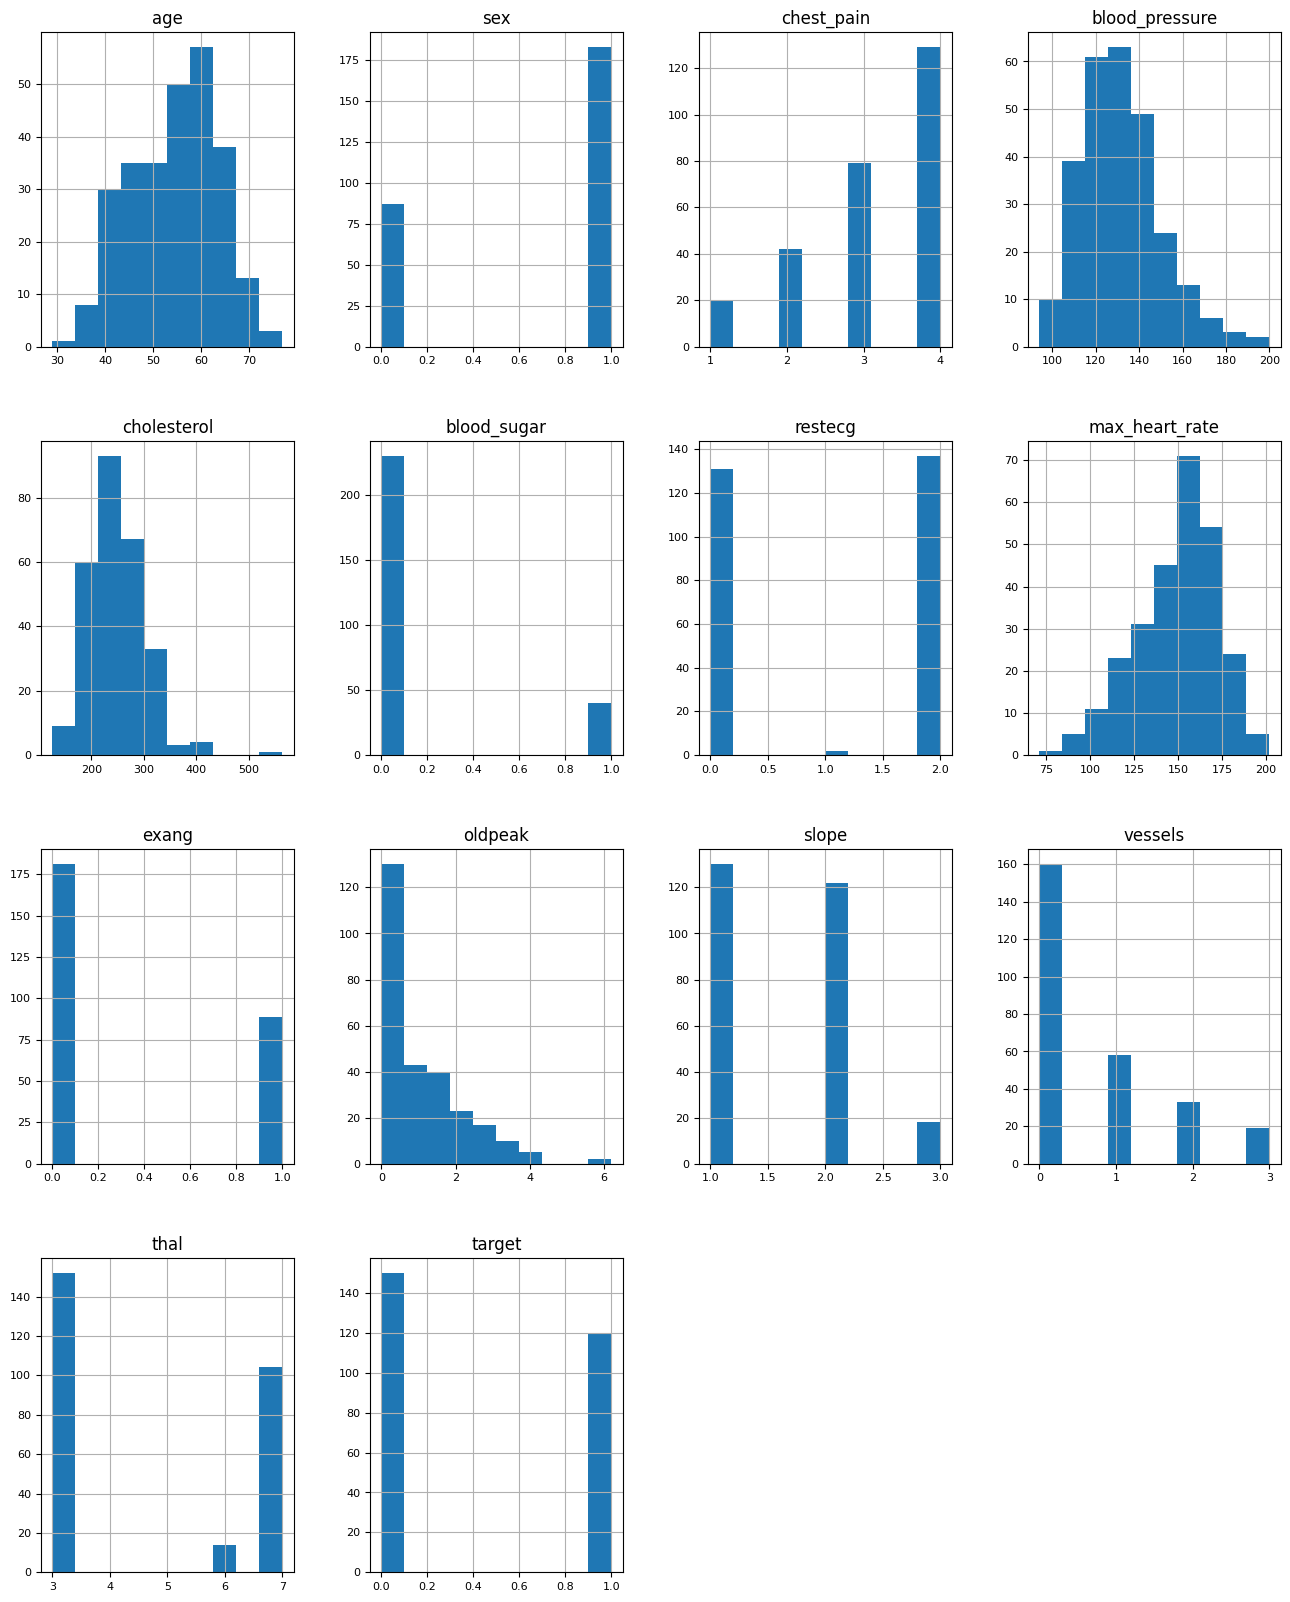

In [ ]:
heart.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

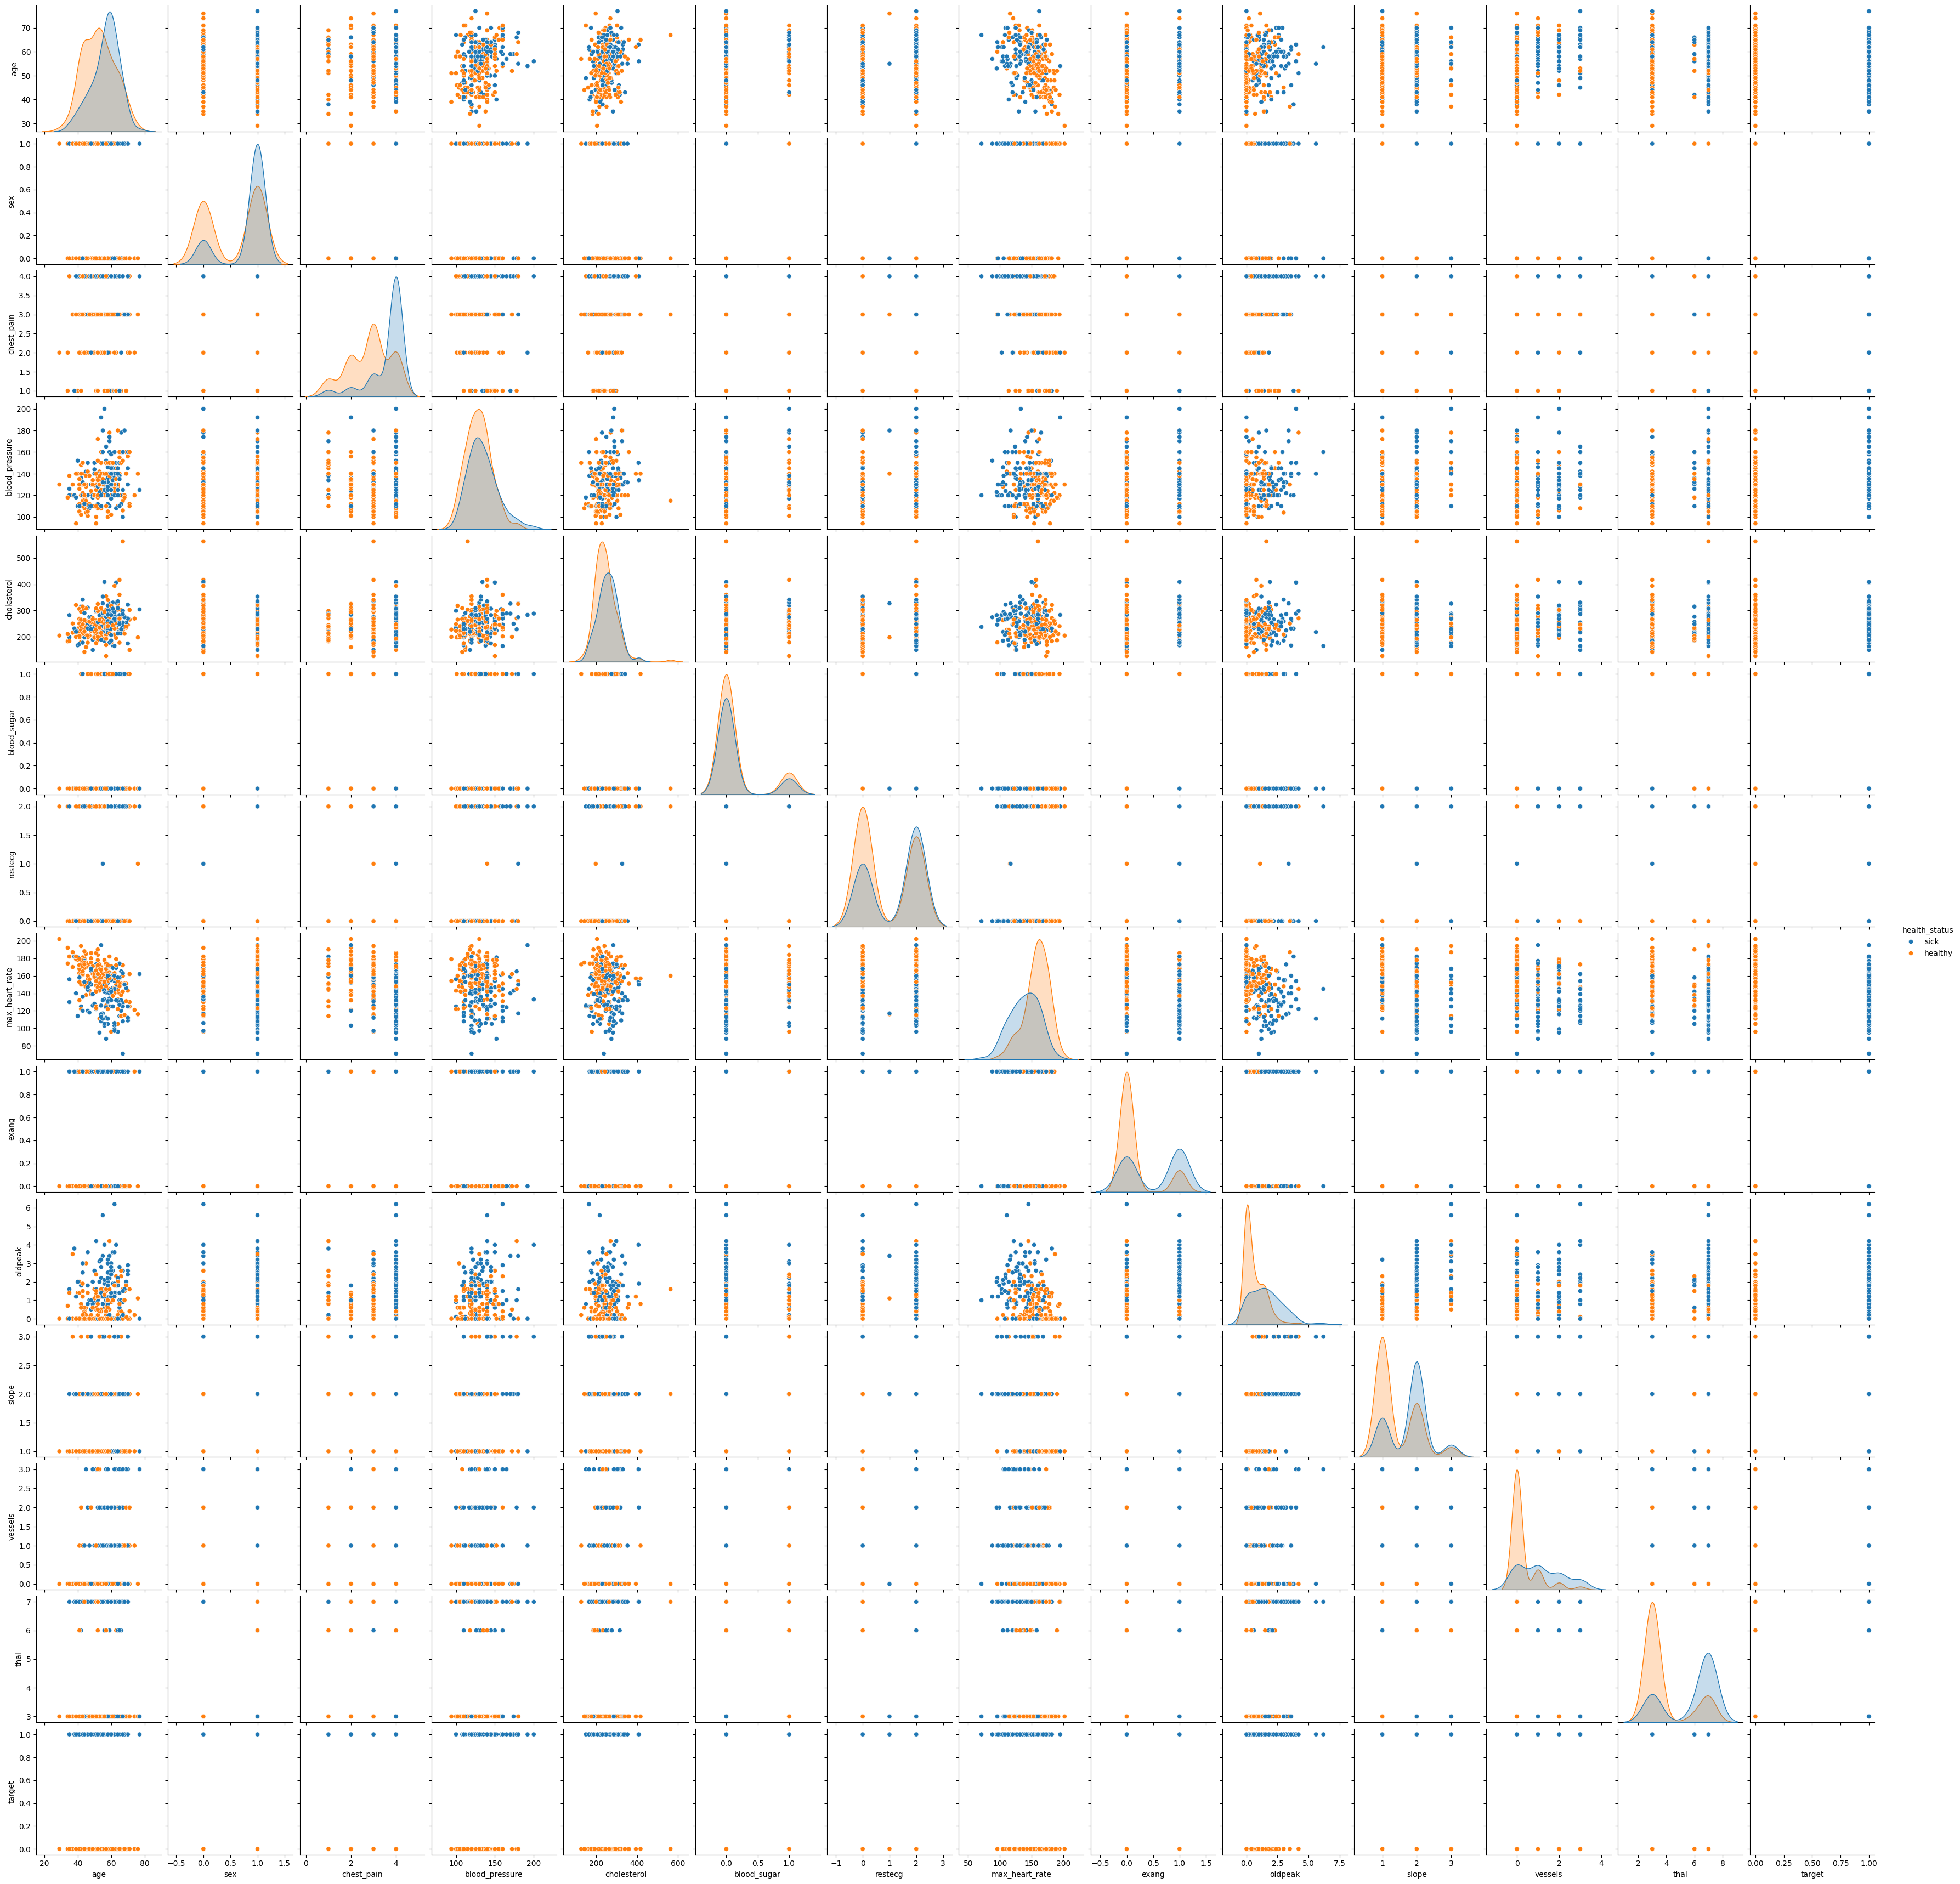

In [ ]:
sns.pairplot(heart, hue='health_status')

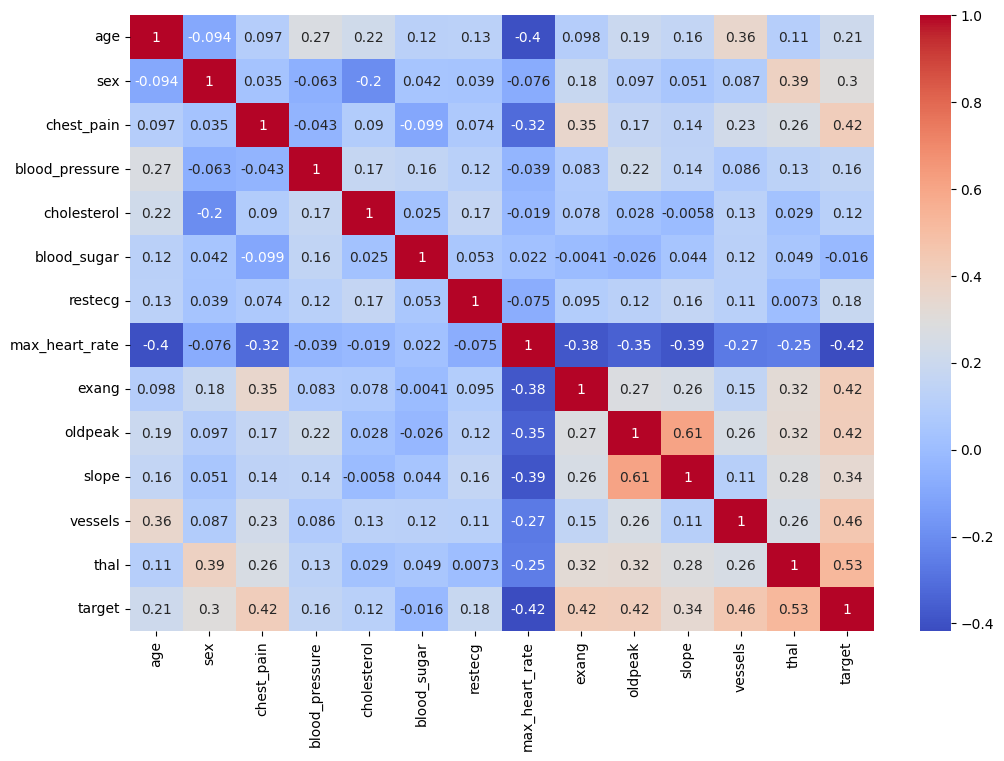

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_heart = heart.select_dtypes(include=[np.number])

corr_matrix = numeric_heart.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
heart['gender'].value_counts()

,count
gender,
M,183
F,87


In [ ]:
heart.groupby(['gender', 'health_status'])['gender'].count()

gender  health_status
F       healthy           67
        sick              20
M       healthy           83
        sick             100
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

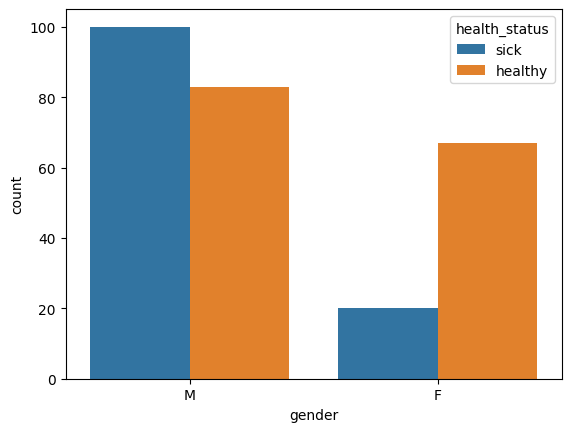

In [ ]:
sns.countplot(data=heart, x='gender', hue='health_status')

In [ ]:
heart['sex'].corr(heart['target'])

np.float64(0.2977207557240846)

<Axes: xlabel='chest_pain', ylabel='count'>

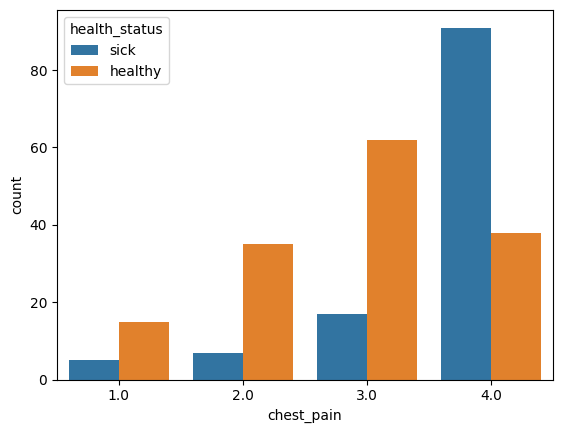

In [ ]:
sns.countplot(data=heart, x='chest_pain', hue='health_status')

In [ ]:
heart['chest_pain'].corr(heart['target'])

np.float64(0.41743620562785266)

<Axes: xlabel='slope', ylabel='count'>

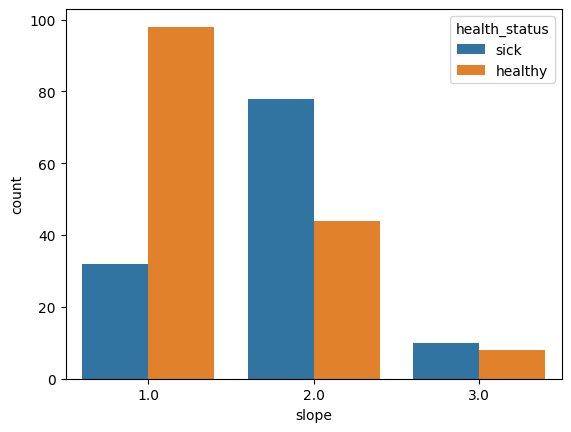

In [ ]:
sns.countplot(data=heart, x='slope', hue='health_status')

In [ ]:
heart['slope'].corr(heart['target'])

np.float64(0.3376159572329903)

<Axes: xlabel='max_heart_rate', ylabel='Density'>

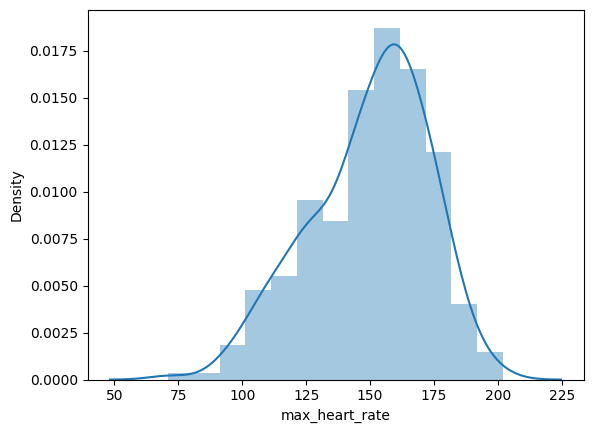

In [ ]:
sns.distplot(heart['max_heart_rate'])

<Axes: xlabel='max_heart_rate', ylabel='count'>

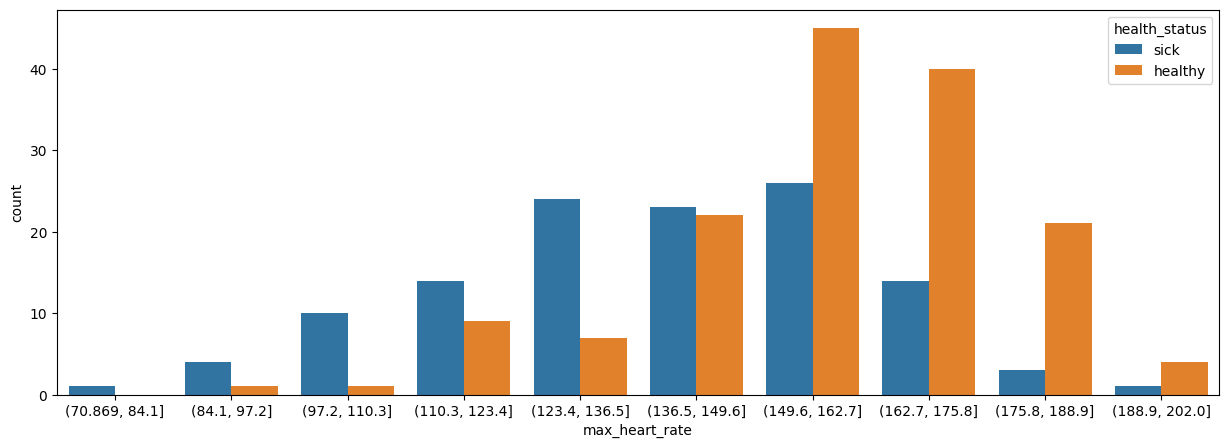

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=heart, x=pd.cut(heart['max_heart_rate'], 10), hue='health_status')

In [ ]:
heart['max_heart_rate'].corr(heart['target'])

np.float64(-0.4185139653265939)

<Axes: xlabel='thal', ylabel='count'>

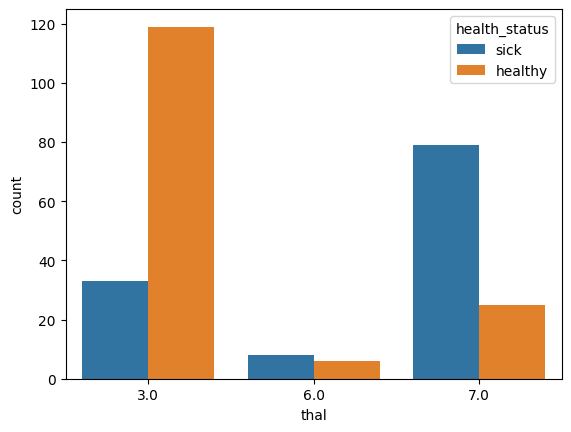

In [ ]:
sns.countplot(data=heart, x='thal', hue='health_status')

In [ ]:
heart['thal'].corr(heart['target'])

np.float64(0.5250203329618741)

<Axes: xlabel='vessels', ylabel='count'>

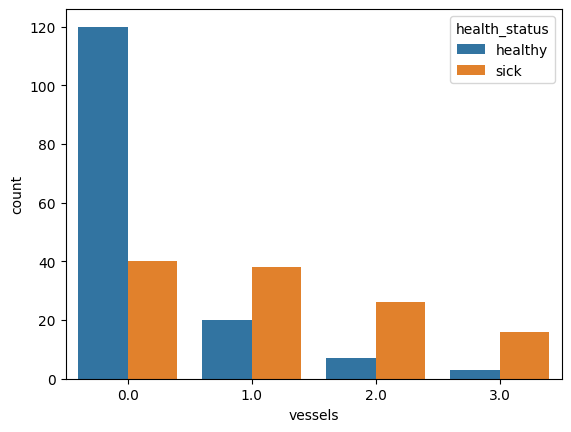

In [ ]:
sns.countplot(data=heart, x='vessels', hue='health_status')

In [ ]:
heart['vessels'].corr(heart['target'])

np.float64(0.45533645047270865)

<Axes: xlabel='oldpeak', ylabel='count'>

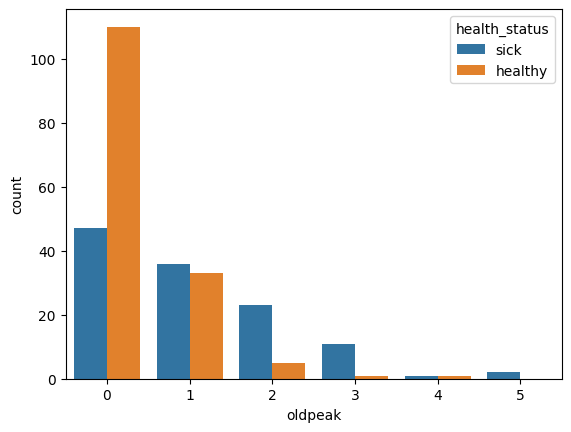

In [ ]:
sns.countplot(data=heart, x=pd.cut(heart['oldpeak'], 6, labels=[0,1,2,3,4,5]), hue='health_status')

In [ ]:
heart['oldpeak'].corr(heart['target'])

np.float64(0.4179674372274263)

In [ ]:
heart['oldpeak'].corr(heart['vessels'])

np.float64(0.25500546187126305)

<Axes: xlabel='oldpeak', ylabel='Density'>

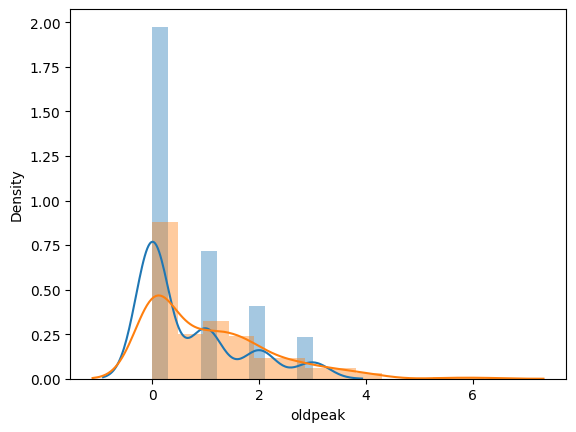

In [ ]:
sns.distplot(heart['vessels'])
sns.distplot(heart['oldpeak'])

In [ ]:
heart['age'].describe()

,age
count,270.000000
mean,54.433333
std,9.109067
min,29.000000
25%,48.000000
50%,55.000000
75%,61.000000
max,77.000000


In [ ]:
heart['age'].mean()

np.float64(54.43333333333333)

<Axes: xlabel='age', ylabel='Density'>

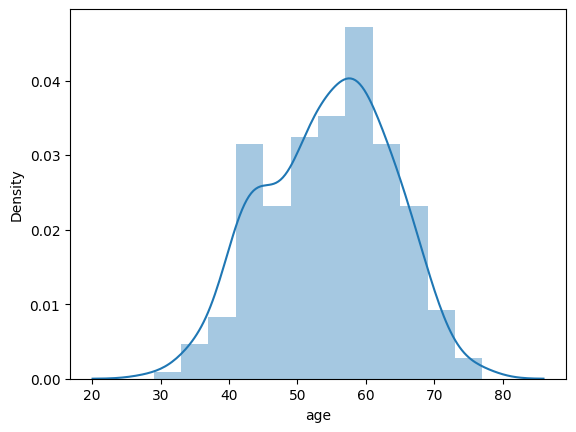

In [ ]:
sns.distplot(heart['age'])

<Axes: xlabel='blood_pressure', ylabel='Density'>

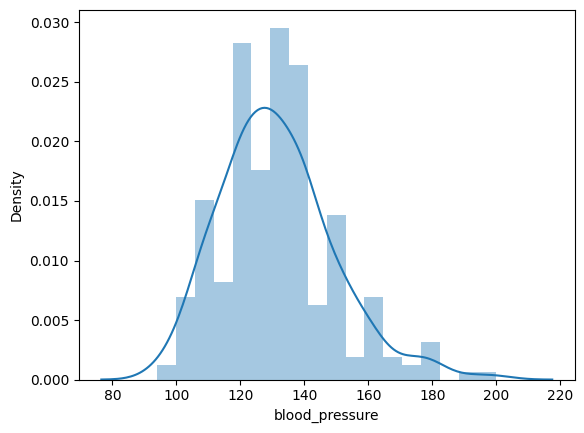

In [ ]:
sns.distplot(heart['blood_pressure'])

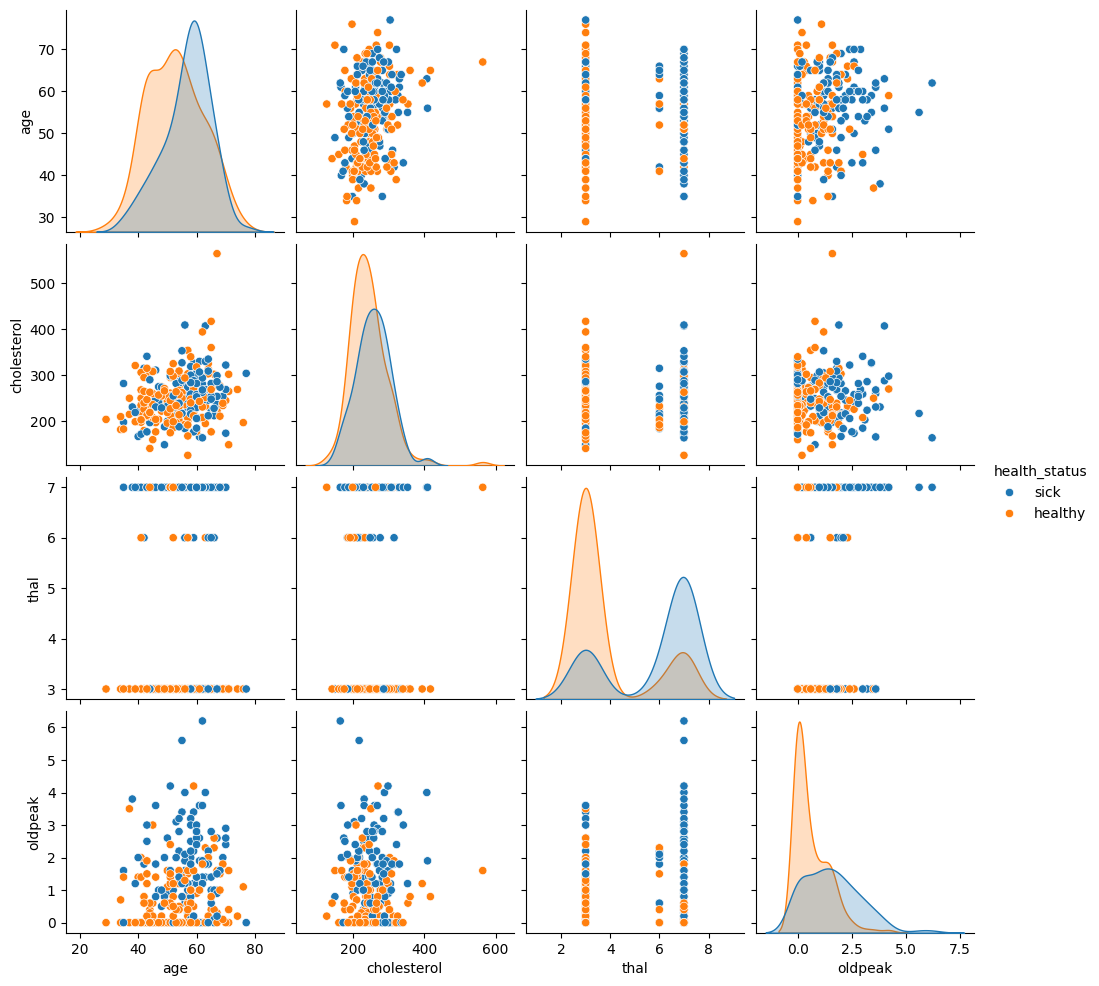

In [ ]:
sns.pairplot(heart , vars = ['age', 'cholesterol', 'thal', 'oldpeak'], hue='health_status')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
import numpy as np

In [ ]:
import shap

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])

In [ ]:
heart = pd.get_dummies(heart, columns = ['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [ ]:
labels = heart['target']
features = heart.drop(['target'], axis = 1)

In [ ]:
features_train , features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state=42)

In [ ]:
heart.head()

,age,blood_pressure,cholesterol,max_heart_rate,oldpeak,vessels,target,sex_1.0,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0,blood_sugar_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,3.0,1,True,False,False,True,False,False,True,False,True,False,False,False
1,1.382140,-0.916759,6.093004,0.446409,0.481153,0.0,0,False,False,True,False,False,False,True,False,True,False,False,True
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0.0,1,True,True,False,False,False,False,False,False,False,False,False,True
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,1.0,0,True,False,False,True,False,False,False,True,True,False,False,True
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1.0,0,False,True,False,False,False,False,True,True,False,False,False,False


[0.8148148148148148, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519, 0.8518518518518519]


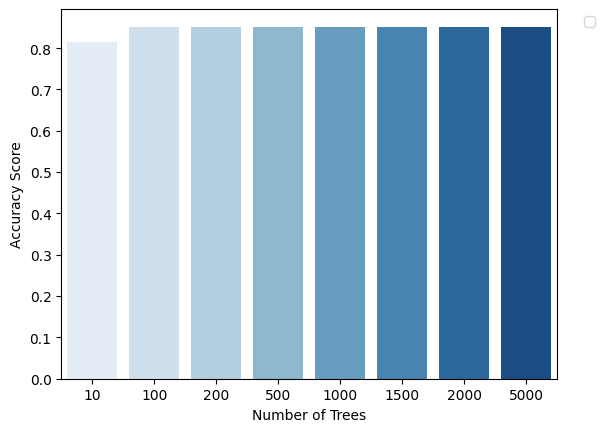

In [ ]:
randomForest_scores = []
trees = [10, 100, 200, 500, 1000, 1500, 2000, 5000]
for x in trees:
    randomForest = RandomForestClassifier(n_estimators = x, random_state = 1, max_depth=1)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(x=trees, y=randomForest_scores, palette="Blues")
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

[0.8518518518518519, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


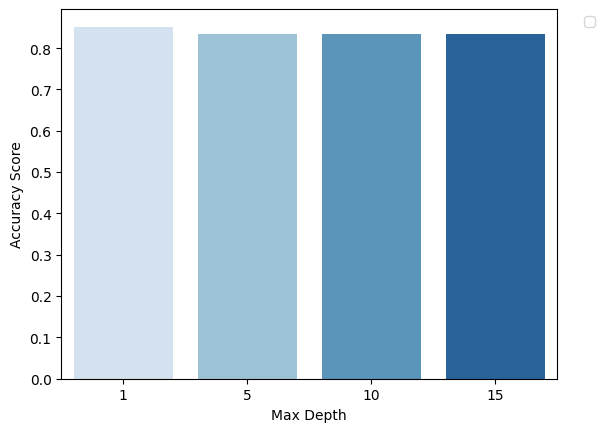

In [ ]:
randomForest_scores = []
depth = [1, 5, 10, 15]
for x in depth:
    randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 42, max_depth=x)
    randomForest.fit(features_train, labels_train)
    randomForest_scores.append(randomForest.score(features_test, labels_test))
print(randomForest_scores)

sns.barplot(x=depth, y=randomForest_scores, palette="Blues")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
randomForest = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=1)

In [ ]:
randomForest.fit(features_train, labels_train);

In [ ]:
randomForest.score(features_test, labels_test)

score = round(randomForest.score(features_test,labels_test), 3) *100

print(f"Random Forest accuracy is {score}%")

Random Forest accuracy is 85.2%


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator=randomForest,
    X=features_test,
    y=labels_test,
    n_repeats=10,
    random_state=42
)

importances = result.importances_mean
stds = result.importances_std

indices = importances.argsort()[::-1]

sorted_features = features_test.columns[indices]
sorted_importances = importances[indices]
sorted_stds = stds[indices]

import pandas as pd

df = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

df["Weight ± Std"] = df.apply(
    lambda row: f"{row['Weight']:.4f} ± {row['Std']:.4f}",
    axis=1
)

df = df[["Weight ± Std", "Feature"]]

def color_pos_neg(val):
    if isinstance(val, str) and val.startswith('-'):
        color = 'red'
    else:
        color = 'green'

    return f'color: {color}'

styled_df = df.style.applymap(color_pos_neg, subset=['Weight ± Std'])
styled_df


df_numeric = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

styled_df = (
    df_numeric.style
      .background_gradient(cmap='RdYlGn', subset=['Weight'])
      .format({"Weight": "{:.4f}", "Std": "{:.4f}"})
)
styled_df

,Feature,Weight,Std
0,thal_7.0,0.0667,0.0390
1,vessels,0.0630,0.0264
2,exang_1.0,0.0481,0.0189
3,chest_pain_4.0,0.0315,0.0085
4,max_heart_rate,0.0241,0.0119
5,age,0.0204,0.0130
6,oldpeak,0.0148,0.0246
7,sex_1.0,0.0074,0.0091
8,chest_pain_3.0,0.0056,0.0085
9,chest_pain_2.0,0.0037,0.0074


Text(0.5, 1.0, 'Random Forest: Confusion Matrix')

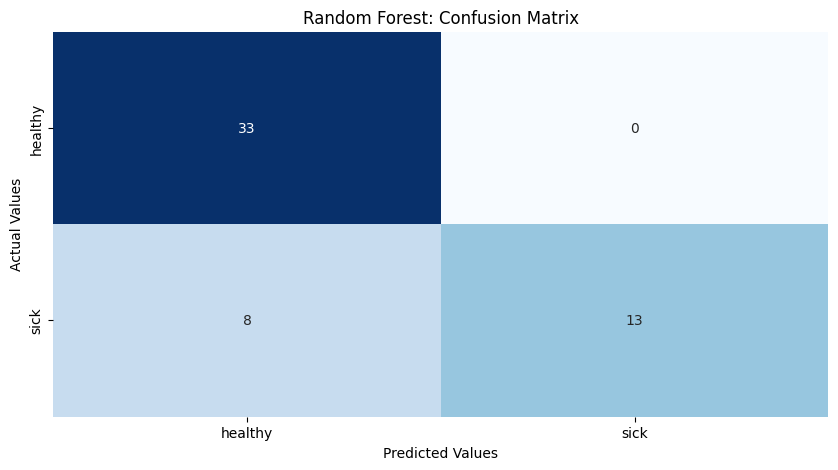

In [ ]:
labels_predicted = randomForest.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest: Confusion Matrix')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 83.3%


Max K Nearest Neighbors Accuracy is 87.04%
Best K is 5


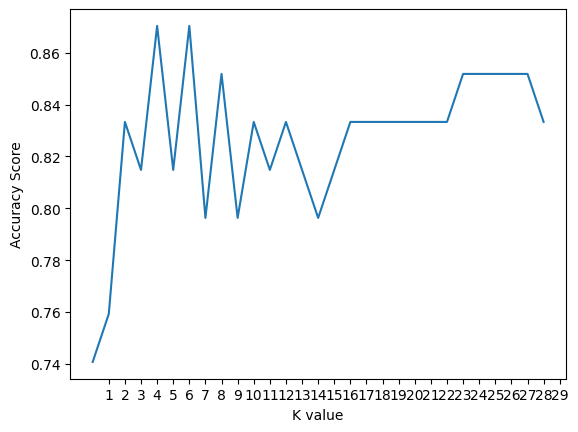

In [ ]:
accuracyScores = []

for x in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = x)
    knn2.fit(features_train, labels_train)
    accuracyScores.append(knn2.score(features_test, labels_test))


sns.lineplot(accuracyScores)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Accuracy Score")


best_k = accuracyScores.index(max(accuracyScores)) + 1
max_score = round((max(accuracyScores) * 100), 2)

print(f"Max K Nearest Neighbors Accuracy is {max_score}%")
print(f"Best K is {best_k}")

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(features_train, labels_train)
prediction = knn.predict(features_test)


score = round(knn.score(features_test, labels_test), 3) *100
print(f"K Nearest Neighbors accuracy is {score}%")

K Nearest Neighbors accuracy is 83.3%


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator=randomForest,
    X=features_test,
    y=labels_test,
    n_repeats=10,
    random_state=1
)

importances = result.importances_mean
stds = result.importances_std

indices = importances.argsort()[::-1]

sorted_features = features_test.columns[indices]
sorted_importances = importances[indices]
sorted_stds = stds[indices]

import pandas as pd

df = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

df["Weight ± Std"] = df.apply(
    lambda row: f"{row['Weight']:.4f} ± {row['Std']:.4f}",
    axis=1
)

df = df[["Weight ± Std", "Feature"]]

def color_pos_neg(val):
    if isinstance(val, str) and val.startswith('-'):
        color = 'red'
    else:
        color = 'green'

    return f'color: {color}'

styled_df = df.style.applymap(color_pos_neg, subset=['Weight ± Std'])
styled_df


df_numeric = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

styled_df = (
    df_numeric.style
      .background_gradient(cmap='RdYlGn', subset=['Weight'])
      .format({"Weight": "{:.4f}", "Std": "{:.4f}"})
)
styled_df

,Feature,Weight,Std
0,thal_7.0,0.0778,0.0308
1,vessels,0.0741,0.0234
2,exang_1.0,0.0519,0.0259
3,chest_pain_4.0,0.0352,0.0210
4,max_heart_rate,0.0259,0.0148
5,oldpeak,0.0241,0.0186
6,age,0.0241,0.0145
7,chest_pain_3.0,0.0074,0.0091
8,sex_1.0,0.0056,0.0085
9,slope_2.0,0.0019,0.0154


Text(0.5, 1.0, 'K Nearest Neighbors: Confusion Matrix')

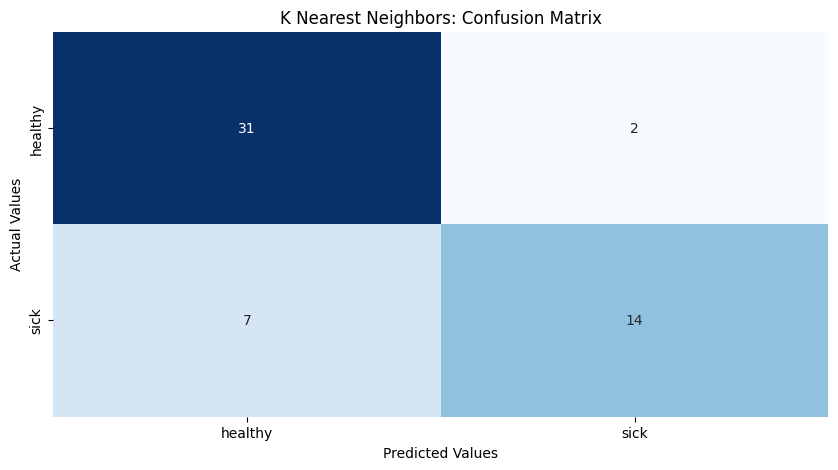

In [ ]:
labels_predicted = knn.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K Nearest Neighbors: Confusion Matrix')

In [ ]:
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       0.82      0.94      0.87        33
        sick       0.88      0.67      0.76        21

    accuracy                           0.83        54
   macro avg       0.85      0.80      0.81        54
weighted avg       0.84      0.83      0.83        54



In [ ]:
logisticRegression = LogisticRegression( solver='lbfgs')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)


score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

Logistic Regression accuracy is 87.0%


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator=randomForest,
    X=features_test,
    y=labels_test,
    n_repeats=10,
    random_state=1
)

importances = result.importances_mean
stds = result.importances_std

indices = importances.argsort()[::-1]

sorted_features = features_test.columns[indices]
sorted_importances = importances[indices]
sorted_stds = stds[indices]

import pandas as pd

df = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

df["Weight ± Std"] = df.apply(
    lambda row: f"{row['Weight']:.4f} ± {row['Std']:.4f}",
    axis=1
)

df = df[["Weight ± Std", "Feature"]]

def color_pos_neg(val):
    if isinstance(val, str) and val.startswith('-'):
        color = 'red'
    else:
        color = 'green'

    return f'color: {color}'

styled_df = df.style.applymap(color_pos_neg, subset=['Weight ± Std'])
styled_df


df_numeric = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

styled_df = (
    df_numeric.style
      .background_gradient(cmap='RdYlGn', subset=['Weight'])
      .format({"Weight": "{:.4f}", "Std": "{:.4f}"})
)
styled_df

,Feature,Weight,Std
0,thal_7.0,0.0778,0.0308
1,vessels,0.0741,0.0234
2,exang_1.0,0.0519,0.0259
3,chest_pain_4.0,0.0352,0.0210
4,max_heart_rate,0.0259,0.0148
5,oldpeak,0.0241,0.0186
6,age,0.0241,0.0145
7,chest_pain_3.0,0.0074,0.0091
8,sex_1.0,0.0056,0.0085
9,slope_2.0,0.0019,0.0154


Text(0.5, 1.0, 'Logistic Regression: Confusion Matrix')

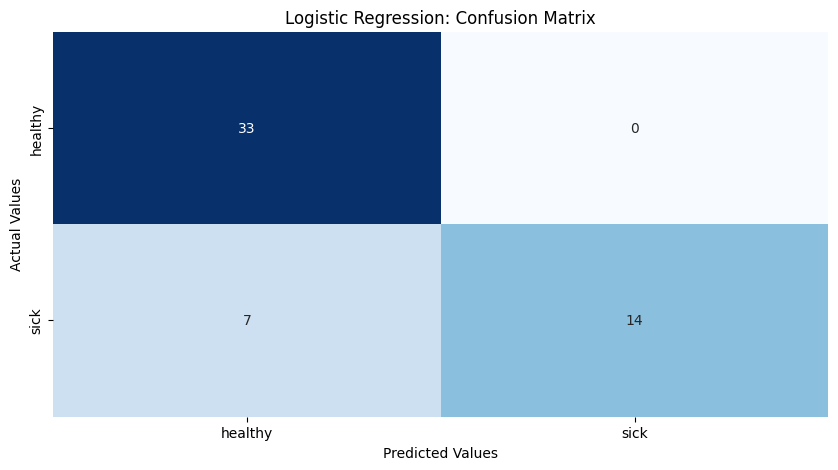

In [ ]:
labels_predicted = logisticRegression.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression: Confusion Matrix')

In [ ]:
labels_predicted = logisticRegression.predict(features_test)
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       0.82      1.00      0.90        33
        sick       1.00      0.67      0.80        21

    accuracy                           0.87        54
   macro avg       0.91      0.83      0.85        54
weighted avg       0.89      0.87      0.86        54



In [ ]:
nb = GaussianNB()
nb.fit(features_train, labels_train)
nb.score(features_test,labels_test)

score = round(nb.score(features_test,labels_test), 3) *100

print(f"Naive Bayes accuracy is {score}%")

Naive Bayes accuracy is 77.8%


Text(0.5, 1.0, 'Naive Bayes: Confusion Matrix')

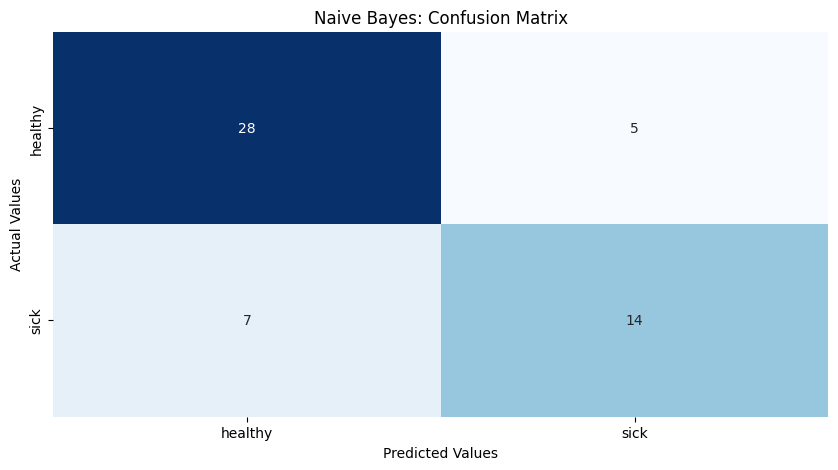

In [ ]:
labels_predicted = nb.predict(features_test)
plt.subplots(figsize=(10,5))

conf_mat = confusion_matrix(labels_test, labels_predicted)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Naive Bayes: Confusion Matrix')

In [ ]:
print(classification_report(labels_test, labels_predicted, target_names = ['healthy', 'sick']))

              precision    recall  f1-score   support

     healthy       0.80      0.85      0.82        33
        sick       0.74      0.67      0.70        21

    accuracy                           0.78        54
   macro avg       0.77      0.76      0.76        54
weighted avg       0.78      0.78      0.78        54



In [ ]:
logisticRegression = LogisticRegression( solver='lbfgs')
logisticRegression.fit(features_train,labels_train)
logisticRegression.score(features_test,labels_test)


score = round(logisticRegression.score(features_test,labels_test), 3) *100
print(f"Logistic Regression accuracy is {score}%")

Logistic Regression accuracy is 87.0%


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator=randomForest,
    X=features_test,
    y=labels_test,
    n_repeats=10,
    random_state=1
)

importances = result.importances_mean
stds = result.importances_std

indices = importances.argsort()[::-1]

sorted_features = features_test.columns[indices]
sorted_importances = importances[indices]
sorted_stds = stds[indices]

import pandas as pd

df = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

df["Weight ± Std"] = df.apply(
    lambda row: f"{row['Weight']:.4f} ± {row['Std']:.4f}",
    axis=1
)

df = df[["Weight ± Std", "Feature"]]

def color_pos_neg(val):
    if isinstance(val, str) and val.startswith('-'):
        color = 'red'
    else:
        color = 'green'

    return f'color: {color}'

styled_df = df.style.applymap(color_pos_neg, subset=['Weight ± Std'])
styled_df


df_numeric = pd.DataFrame({
    "Feature": sorted_features,
    "Weight": sorted_importances,
    "Std": sorted_stds
})

styled_df = (
    df_numeric.style
      .background_gradient(cmap='RdYlGn', subset=['Weight'])
      .format({"Weight": "{:.4f}", "Std": "{:.4f}"})
)
styled_df

,Feature,Weight,Std
0,thal_7.0,0.0778,0.0308
1,vessels,0.0741,0.0234
2,exang_1.0,0.0519,0.0259
3,chest_pain_4.0,0.0352,0.0210
4,max_heart_rate,0.0259,0.0148
5,oldpeak,0.0241,0.0186
6,age,0.0241,0.0145
7,chest_pain_3.0,0.0074,0.0091
8,sex_1.0,0.0056,0.0085
9,slope_2.0,0.0019,0.0154
